In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/.DS_Store
/kaggle/input/playground-series-s4e10/test.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/sample_submission.csv


In [2]:
filenames

['.DS_Store', 'test.csv', 'train.csv', 'sample_submission.csv']

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [6]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Preprocessing: Select only numeric columns
X = df.select_dtypes(include=[np.number])

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X)

# Predict outliers (-1 for outliers, 1 for inliers)
outlier_labels = iso_forest.predict(X)

# Add a column in the dataset to mark outliers
df['Outlier'] = outlier_labels

# Separate outliers and inliers for visualization
outliers = df[df['Outlier'] == -1]
inliers = df[df['Outlier'] == 1]

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [8]:
print("Number of Outliers Detected :",len(outliers))

Number of Outliers Detected : 5865


In [9]:
s = pd.DataFrame(df.columns,index=None)
s

,0
0,id
1,person_age
2,person_income
3,person_home_ownership
4,person_emp_length
5,loan_intent
6,loan_grade
7,loan_amnt
8,loan_int_rate
9,loan_percent_income


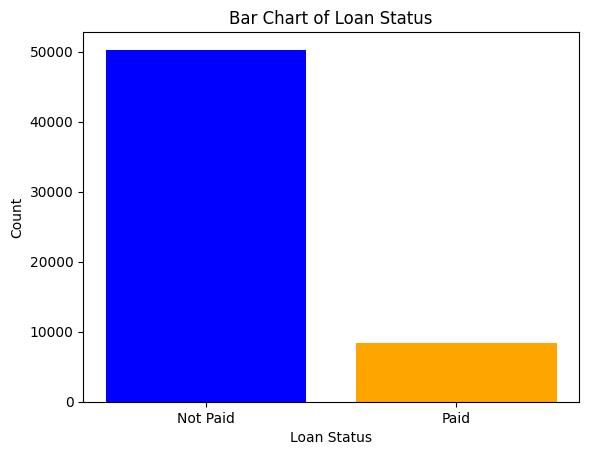

Number of people who have paid: 8350
Number of people who have not paid: 50295


In [10]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in 'loan_status'
loan_status_counts = df['loan_status'].value_counts()

# Plotting the bar chart
plt.bar(loan_status_counts.index, loan_status_counts.values, color=['blue', 'orange'])
plt.xticks([0, 1], ['Not Paid', 'Paid'])  # Customize labels if 'loan_status' uses binary values like 0 and 1
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Bar Chart of Loan Status')
plt.show()

# Display the counts
paid_count = loan_status_counts.get(1, 0)  # Assuming 1 represents 'Paid'
not_paid_count = loan_status_counts.get(0, 0)  # Assuming 0 represents 'Not Paid'

print(f"Number of people who have paid: {paid_count}")
print(f"Number of people who have not paid: {not_paid_count}")


In [11]:
def stacked_bar_plot(df, feature, target='loan_status'):
    crosstab = pd.crosstab(df[feature], df[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')
    plt.title(f'Stacked Bar Plot of {feature} vs {target}')
    plt.ylabel('Proportion')
    plt.show()

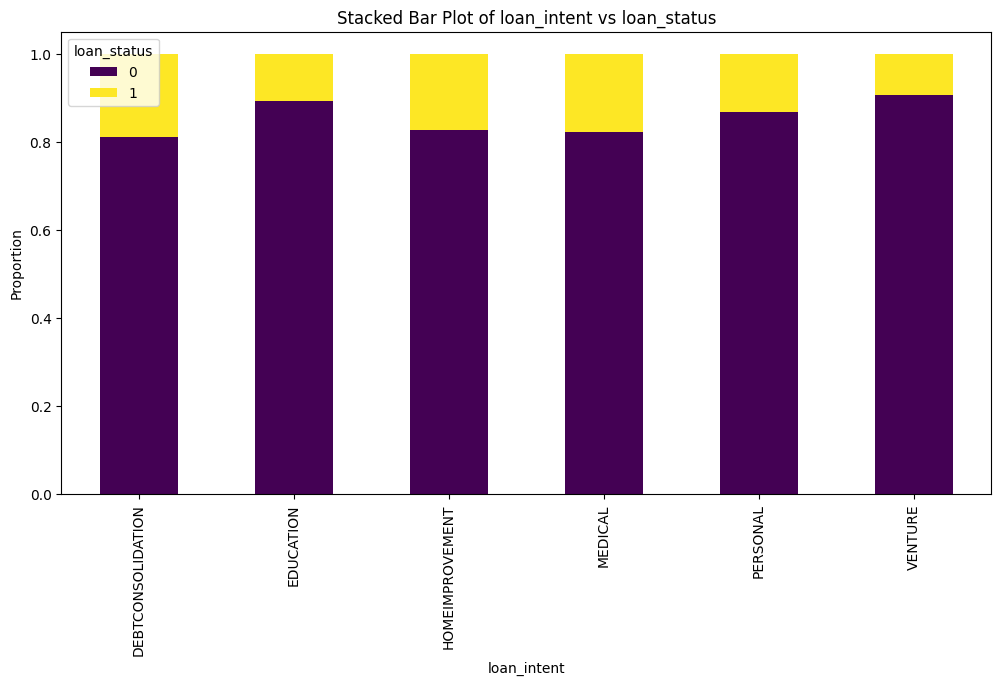

In [12]:
stacked_bar_plot(df, 'loan_intent')

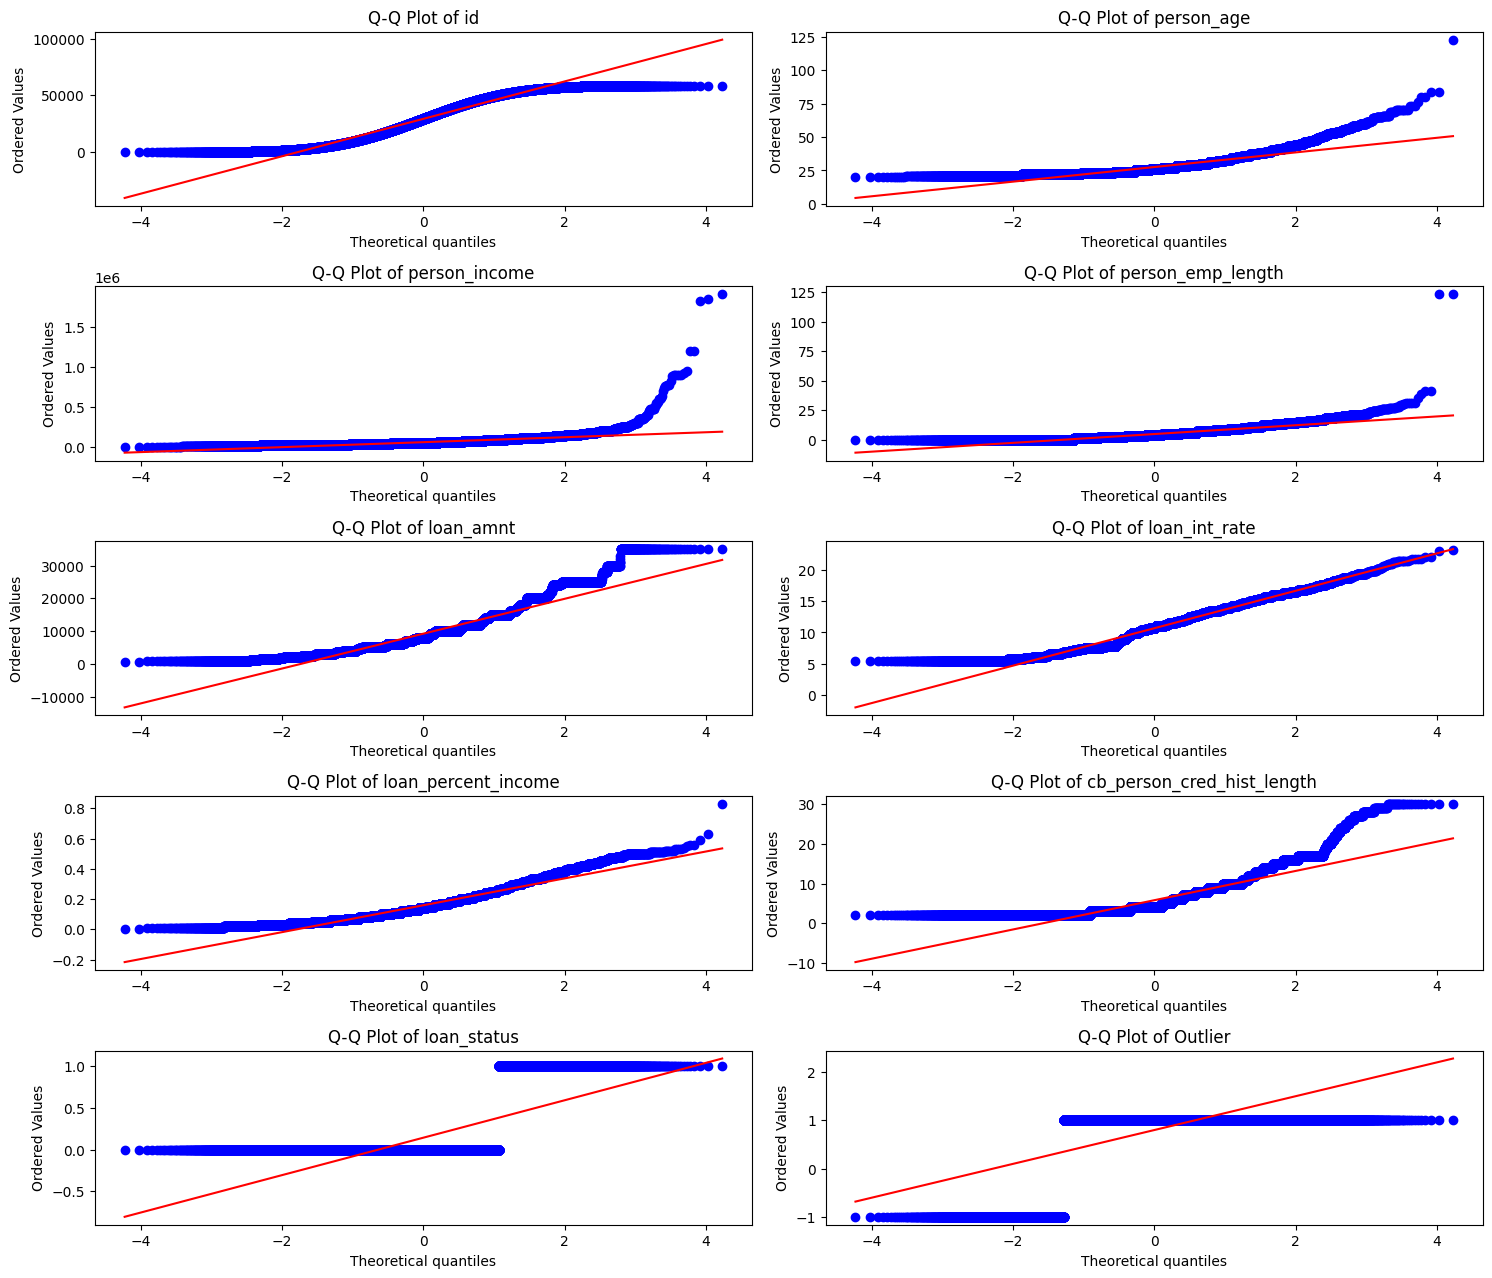

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Select only numeric columns from the dataset
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Plot Q-Q plot for each numeric column
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 2 + 1, 2, i)  # Adjusts the subplot layout
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
plt.tight_layout()
plt.show()


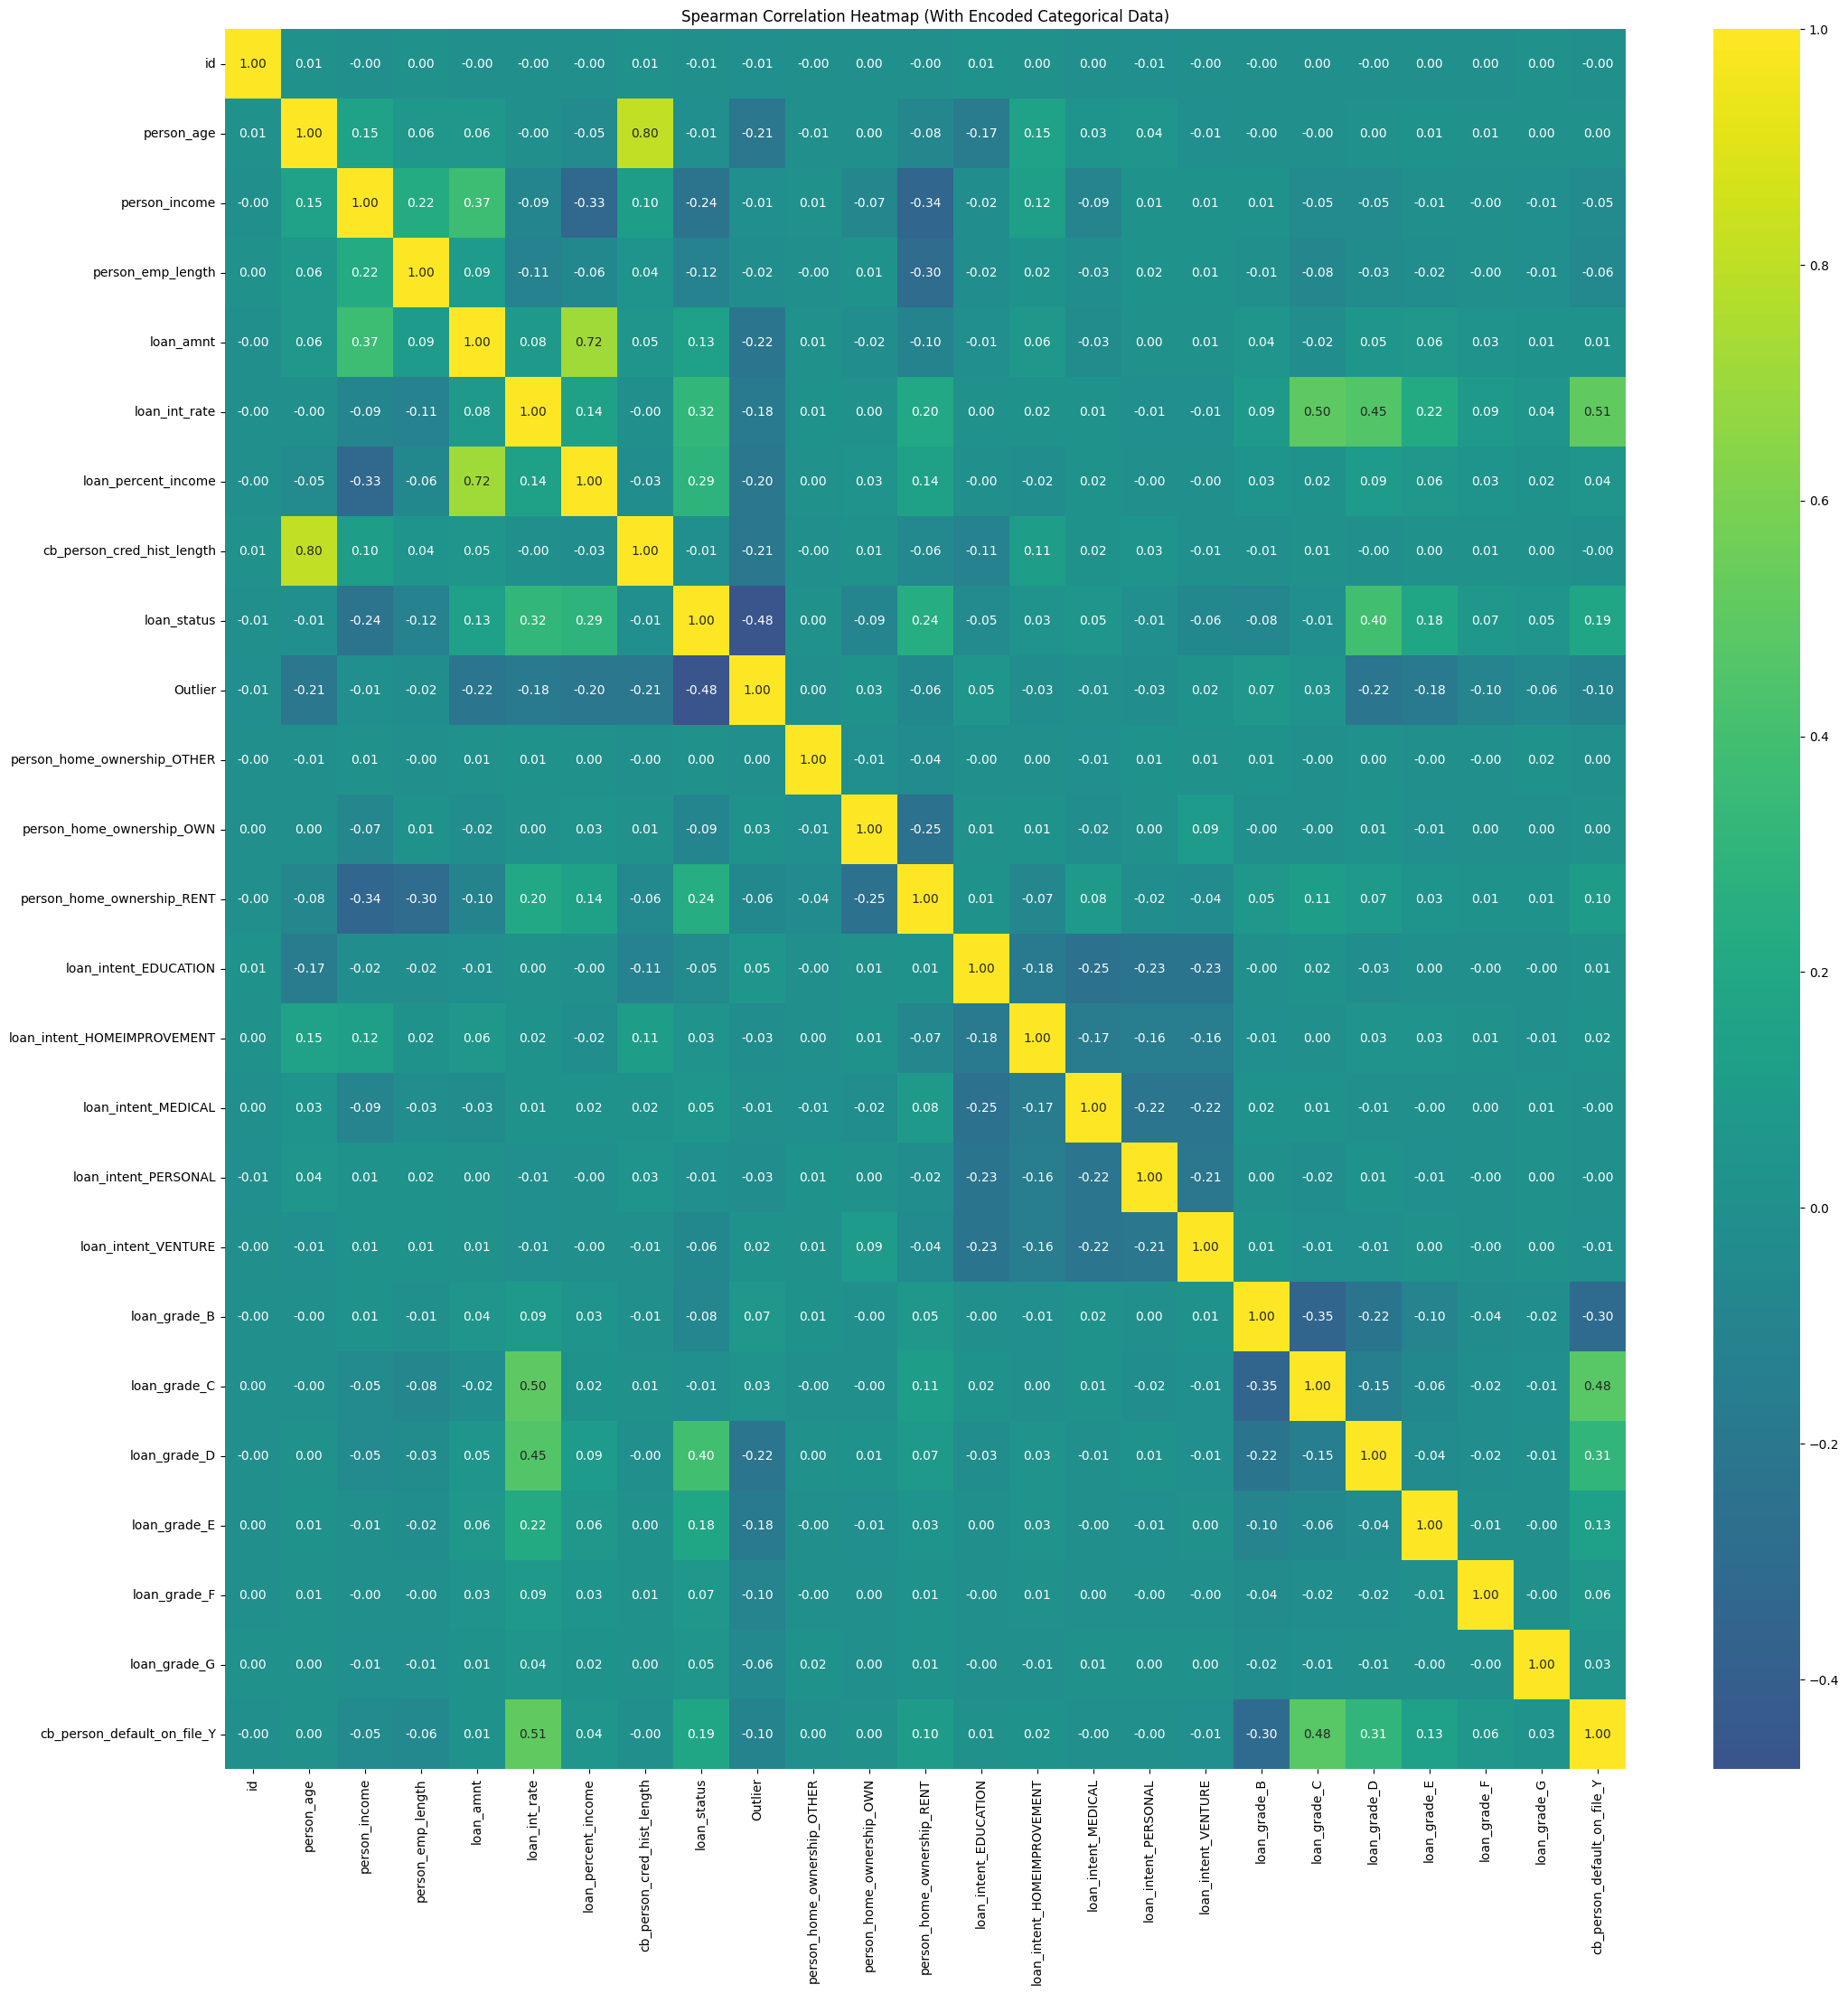

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numerical with one-hot encoding
df_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)

# Step 2: Calculate the Spearman correlation matrix
spearman_corr = df_encoded.corr(method='spearman')

# Step 3: Plot the correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="viridis", center=0)
plt.title("Spearman Correlation Heatmap (With Encoded Categorical Data)")
plt.show()


In [15]:
# Calculate the Spearman correlation matrix
spearman_corr = df_encoded.corr(method='spearman')

# Get the correlation of all columns with 'loan_status', sorted by absolute value
loan_status_corr = spearman_corr['loan_status'].abs().sort_values(ascending=False)

# Display the top features contributing to loan_status
print("Top contributing columns to loan_status:")
print(loan_status_corr[1:])  # Exclude 'loan_status' itself


Top contributing columns to loan_status:
Outlier                        0.476068
loan_grade_D                   0.395646
loan_int_rate                  0.317742
loan_percent_income            0.293639
person_home_ownership_RENT     0.239620
person_income                  0.235535
cb_person_default_on_file_Y    0.186962
loan_grade_E                   0.182878
loan_amnt                      0.128752
person_emp_length              0.118428
person_home_ownership_OWN      0.087556
loan_grade_B                   0.083765
loan_grade_F                   0.067644
loan_intent_VENTURE            0.064378
loan_intent_EDUCATION          0.051005
loan_intent_MEDICAL            0.049139
loan_grade_G                   0.045889
loan_intent_HOMEIMPROVEMENT    0.031063
person_age                     0.014528
cb_person_cred_hist_length     0.012738
loan_intent_PERSONAL           0.012461
loan_grade_C                   0.009654
id                             0.008138
person_home_ownership_OTHER    0.002918

In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           58645 non-null  int64  
 1   person_age                   58645 non-null  int64  
 2   person_income                58645 non-null  int64  
 3   person_emp_length            58645 non-null  float64
 4   loan_amnt                    58645 non-null  int64  
 5   loan_int_rate                58645 non-null  float64
 6   loan_percent_income          58645 non-null  float64
 7   cb_person_cred_hist_length   58645 non-null  int64  
 8   loan_status                  58645 non-null  int64  
 9   Outlier                      58645 non-null  int64  
 10  person_home_ownership_OTHER  58645 non-null  bool   
 11  person_home_ownership_OWN    58645 non-null  bool   
 12  person_home_ownership_RENT   58645 non-null  bool   
 13  loan_intent_EDUC

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Selected top features including categorical
selected_features = ['loan_int_rate', 'loan_percent_income', 'person_home_ownership', 'person_income',
                     'cb_person_default_on_file', 'loan_amnt', 'person_emp_length']

# Extract the data for selected features
X = df[selected_features]
y = df['loan_status']

# Identify categorical columns within selected features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply OneHotEncoder to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.9313402296237354

Confusion Matrix:
 [[14834   292]
 [  916  1552]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     15126
           1       0.84      0.63      0.72      2468

    accuracy                           0.93     17594
   macro avg       0.89      0.80      0.84     17594
weighted avg       0.93      0.93      0.93     17594



In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


selected_features = ['loan_int_rate', 'loan_percent_income', 'person_home_ownership', 'person_income',
                     'cb_person_default_on_file', 'loan_amnt', 'person_emp_length']
# Extract features and target variable
X = df[selected_features]
y = df['loan_status']

# Identify categorical columns within selected features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Load the sample submission file
sample = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')

# Load your test dataset (make sure to specify the correct path)
test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')  # Replace with your actual test dataset path

# Make sure to apply the same preprocessing to the test data
test_encoded = pd.get_dummies(test[selected_features], drop_first=True)

# Align the columns of test_encoded with the training data
# This is important to ensure consistent columns for predictions
test_encoded = test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Scale the test data using the same scaler fitted on the training data
test_scaled = scaler.transform(test_encoded)

# Store predicted probabilities in the sample submission DataFrame
sample['loan_status'] = rf_model.predict_proba(test_scaled)[:, 1]

# Save the updated DataFrame to submission.csv
sample.to_csv('/kaggle/output/submission.csv', index=False)

print("Submission file created: submission.csv")


Submission file created: submission.csv
